In [1]:
import mysql.connector

connection =  mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="classicmodels",
    port=3307
)
if(connection.is_connected()):
    print("Yipeee!! DB is connected o!")
else:
    print("DB could not be connected to")

Yipeee!! DB is connected o!


In [2]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(
        host="localhost",            # Host name (e.g., localhost)
        user="root",        # MySQL username
        password="",    # MySQL password
        database="classicmodels",     # Database name
        port = 3307
    )
    def createTbl():
        query = "CREATE TABLE test (id INT PRIMARY KEY AUTO_INCREMENT, name VARCHAR(20),phone VARCHAR(11))"
        cursor.execute(query)
        return True
    def addData(name,phone):
        insert_query = "INSERT INTO test (name, phone) VALUES (%s, %s)"
        data = (name, phone)

        # Execute the query
        cursor.execute(insert_query, data)

        # Commit the transaction
        connection.commit()
        return cursor.rowcount
    # Check if the connection was successful
    if connection.is_connected():
        # print("Connected to MySQL database.")
        cursor = connection.cursor(dictionary=True)
        try:
            rows = addData("Timothy","080345665")
            if(rows>0):
                print(f"{cursor.rowcount} row(s) inserted.")
            else:
                print(f"No record was added")
        except Exception as e:
            print("An error occured",e)
        # if(createTbl()):
        #     print("Table has been created successfully")
        # cursor = connection.cursor(dictionary=True)
        # cursor.execute("SELECT * FROM customers")
        # results = cursor.fetchall()
    else:
        print("Failed to connect to database.")
        exit()
except Error as e:
    print("An error as occured",e)

1 row(s) inserted.


/var/folders/gg/154w9t3n3gzbd8h7p0k36p1h0000gn/T/ipykernel_77627/284912937.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


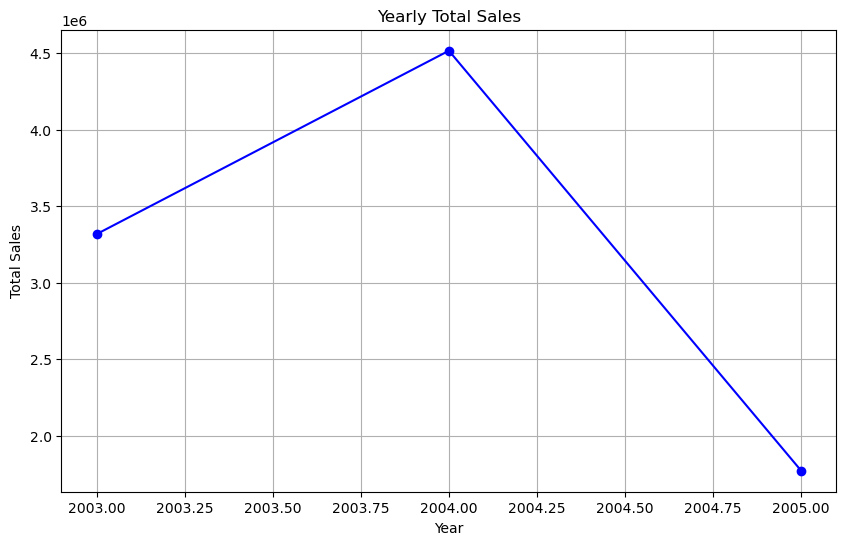

In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
# Connect to the MySQL database
connection = mysql.connector.connect(
    host='localhost',    # Replace with your host
    user='root',  # Replace with your MySQL username
    password='',  # Replace with your MySQL password
    database='classicmodels',   # Replace with your database name
    port=3307
)

# Query to get total sales year-on-year
query = """
SELECT YEAR(orderDate) AS Year, SUM(quantityOrdered * priceEach) AS TotalSales
FROM orders
JOIN orderdetails ON orders.orderNumber = orderdetails.orderNumber
GROUP BY YEAR(orderDate)
ORDER BY Year;
"""

# Read data into a pandas DataFrame
df = pd.read_sql(query, connection)

# Close the database connection
connection.close()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['TotalSales'], marker='o', color='b', linestyle='-')
plt.title("Yearly Total Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

Pie chart saved as Yearly_Total_Sales_Distribution.png


/var/folders/gg/154w9t3n3gzbd8h7p0k36p1h0000gn/T/ipykernel_77627/4279684908.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


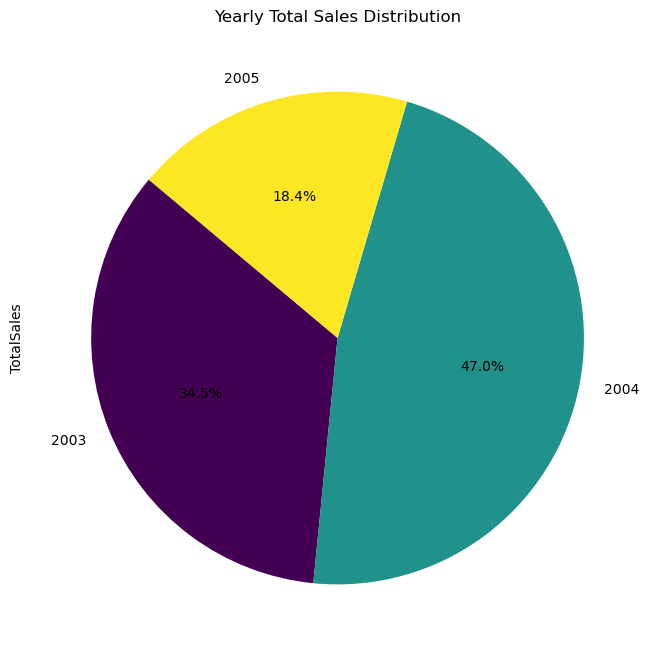

In [6]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
# Connect to the MySQL database
connection = mysql.connector.connect(
    host='localhost',    # Replace with your host
    user='root',  # Replace with your MySQL username
    password='',  # Replace with your MySQL password
    database='classicmodels',   # Replace with your database name
    port=3307
)

# Query to get total sales year-on-year
query = """
SELECT YEAR(orderDate) AS Year, SUM(quantityOrdered * priceEach) AS TotalSales
FROM orders
JOIN orderdetails ON orders.orderNumber = orderdetails.orderNumber
GROUP BY YEAR(orderDate)
ORDER BY Year;
"""
# cursor =  connection.cursor()
# cursor.execute(query)
# results = cursor.fetchall()
# print(results)
# Read data into a pandas DataFrame
df = pd.read_sql(query, connection)

# Close the database connection
connection.close()

# Plot a pie chart using Pandas only
df.set_index('Year')['TotalSales'].plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentage with one decimal place
    startangle=140,     # Starting angle of the chart
    figsize=(8, 8),     # Size of the figure
    colormap='viridis', # Color map for distinct colors per year
    title="Yearly Total Sales Distribution"  # Chart title
)

# Save the chart to a file
filename = "Yearly_Total_Sales_Distribution.png"
# plt.savefig(filename, format='png', dpi=300)  # Automatically uses matplotlib to save
print(f"Pie chart saved as {filename}")
plt.show()

# Plot the data
# Plot a bar chart using Pandas
# df.set_index('Year')['TotalSales'].plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8), colormap='viridis')
# plt.title("Yearly Total Sales Distribution")
# plt.ylabel("")  # Removes the default ylabel
# filename = "Yearly_Total_Sales_Distribution.png"  # Specify your desired filename
# plt.savefig(filename, format='png', dpi=300)  # Save as PNG with high quality (300 dpi)
# plt.show()